<a href="https://colab.research.google.com/github/Nakib-Nasrullah/Heart_disease/blob/main/ecg_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Imoort libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import(
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score, auc
)

In [30]:
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/ecg_dataset_process.csv')

In [32]:
# Basic exploration
print("Dataset shape:", df.shape)
print("n\First 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())


Dataset shape: (7610, 13)
n\First 5 rows:
   patientAge  P_wave  Q_wave  R_wave  S_wave  T_wave  PR_Interval  \
0          22      80      58     146      51      73         0.22   
1          20      78      57     142      50      71         0.21   
2          22      78      57     142      50      71         0.21   
3          23      78      57     142      50      71         0.21   
4          24      78      57     142      50      71         0.21   

   QRS_Complex  RR_Interval  QT_Interval  QTc_Interval      Disease  \
0         0.07          0.5         0.40          0.57  Tachycardia   
1         0.07          1.0         0.38          0.39       Normal   
2         0.07          0.9         0.38          0.39       Normal   
3         0.07          0.9         0.38          0.39       Normal   
4         0.07          0.9         0.38          0.39       Normal   

   Risk_level  
0           1  
1           0  
2           0  
3           0  
4           0  

Dataset Info:

In [33]:
print("\nBaasic statistics:")
print(df.describe())

print("\nCheck for missing values:")
print(df.isnull().sum())


Baasic statistics:
        patientAge        P_wave        Q_wave        R_wave        S_wave  \
count  7610.000000   7610.000000   7610.000000   7610.000000   7610.000000   
mean     22.556110     66.677792     48.221551    121.654928     42.155716   
std       2.995299    505.526512    367.703410    919.135621    321.728603   
min      18.000000      1.000000    -43.000000      2.000000    -25.000000   
25%      22.000000     50.000000     36.000000     90.000000     31.000000   
50%      22.000000     57.000000     42.000000    104.000000     36.000000   
75%      23.000000     72.000000     52.000000    130.000000     46.000000   
max      47.000000  43728.000000  31802.000000  79506.000000  27827.000000   

             T_wave  PR_Interval  QRS_Complex  RR_Interval  QT_Interval  \
count   7610.000000  7610.000000  7610.000000  7610.000000  7610.000000   
mean      60.654796     0.184907     0.066530     1.084465     0.343012   
std      459.574684     1.378839     0.461826     9.

In [34]:
print("\nTarget variable distribution:")
print(df['Risk_level'].value_counts())


Target variable distribution:
Risk_level
0    6670
1     940
Name: count, dtype: int64


In [35]:
print("\nTarget variable distribution:")
df.columns = df.columns.str.strip()
print(df['Disease'].value_counts())


Target variable distribution:
Disease
Normal         6670
Tachycardia     911
Bradycardia      29
Name: count, dtype: int64


In [36]:
# train (70%) validation (10%) test(20%)

#Separate input (X) and output (y)
X = df.drop('Risk_level', axis=1) # Everything except Risk_level
y = df['Risk_level']              # Only Risk_level

print("X has all patients information (13 colums)")
print("y has Risk_level (1 column)")

# Split: 80% for training, 20% for testing

#Train test split function is very importent for machine learning

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,     # 20% for test
    random_state = 20   # Same result every time # random_state mens in every time same data go to train and same data go to test.
)

print(f"\n We will train with: {len(X_train)} patients")
print(f"We will test with: {len(X_test)} patients")

X has all patients information (13 colums)
y has Risk_level (1 column)

 We will train with: 6088 patients
We will test with: 1522 patients


In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [43]:
# Feature Scaling
scaler = StandardScaler()

# Drop the 'Disease' column from X_train and X_test as it's a categorical feature
X_train_numeric = X_train.drop('Disease', axis=1)
X_test_numeric = X_test.drop('Disease', axis=1)

X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

#Build the Deep Neural Network
#Architecture explanation:

Input layer → number of ECG features

Hidden layers → learn complex patterns

Dropout → prevent overfitting

Output → 1 neuron (binary classification)

In [44]:
#Build the Deep Neural Network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')  # Binary classification
])


In [45]:
#Compile the Model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [46]:
#Early Stopping (Prevents Overfitting)
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# **Train the Model**

In [47]:
history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.1,   # 10% validation (as you requested)
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)
history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.1,   # 10% validation (as you requested)
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8094 - loss: 0.4268 - val_accuracy: 0.8933 - val_loss: 0.2566
Epoch 2/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9231 - loss: 0.1781 - val_accuracy: 0.9031 - val_loss: 0.1938
Epoch 3/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9307 - loss: 0.1516 - val_accuracy: 0.9097 - val_loss: 0.1545
Epoch 4/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9470 - loss: 0.1168 - val_accuracy: 0.9491 - val_loss: 0.1206
Epoch 5/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9639 - loss: 0.1006 - val_accuracy: 0.9557 - val_loss: 0.1153
Epoch 6/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9724 - loss: 0.0773 - val_accuracy: 0.9639 - val_loss: 0.1057
Epoch 7/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9768 - loss: 0.0616 - val_accuracy: 0.9704 - val_loss: 0.0764
Epoch 8/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9726 - loss: 0.0670 - val_acc

# **Evaluate on Test Data**

In [48]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9986 - loss: 0.0193
Test Accuracy: 0.9974


# **Predictions & Classification Metrics**

In [49]:
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


# **Metrics**

In [50]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9973718791064389
Precision: 0.9851485148514851
Recall: 0.995
F1 Score: 0.9900497512437811

Confusion Matrix:
[[1319    3]
 [   1  199]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1322
           1       0.99      0.99      0.99       200

    accuracy                           1.00      1522
   macro avg       0.99      1.00      0.99      1522
weighted avg       1.00      1.00      1.00      1522



# **ROC Curve & AUC**

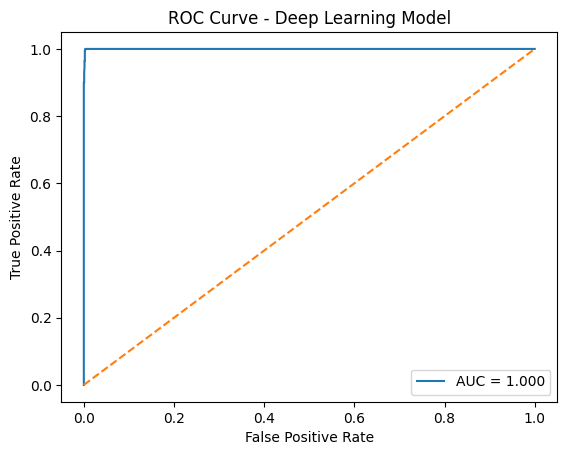

In [51]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Deep Learning Model")
plt.legend()
plt.show()


In [53]:
!pip install shap

**Prepare Background Data**

In [54]:
import shap
X_background = X_train_scaled[np.random.choice(X_train_scaled.shape[0], 100, replace=False)]


# **Create SHAP Explainer for Deep Learning Model**

For TensorFlow / Keras models, bold text

In [55]:
explainer = shap.Explainer(model, X_background)


# **Compute SHAP Values**

In [56]:
shap_values = explainer(X_test_scaled)


PermutationExplainer explainer: 1523it [14:03,  1.80it/s]


# **Feature Names**

In [57]:
feature_names = X.columns.tolist()

# **Global Feature Importance (Summary Plot)**
Interpretation:

Top features = most influential ECG parameters

Red = high feature value

Blue = low feature value

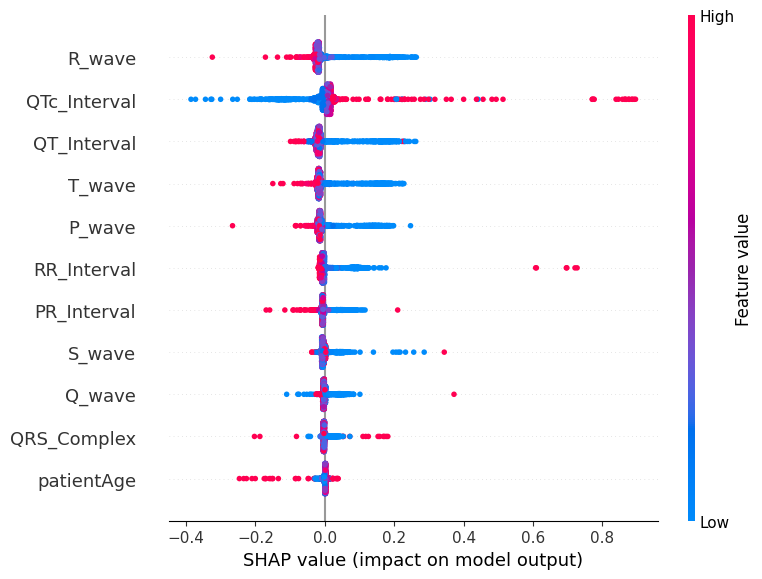

In [58]:
shap.summary_plot(
    shap_values.values,
    X_test_scaled,
    feature_names=feature_names
)


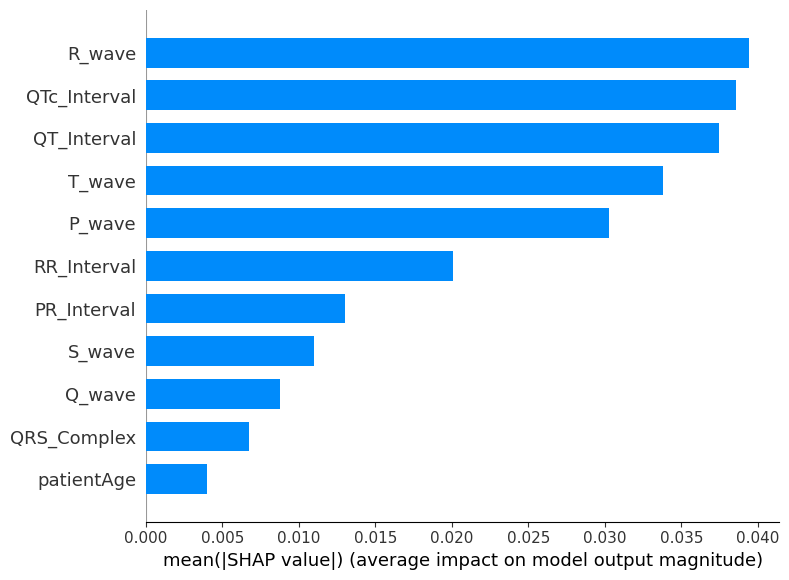

In [59]:
shap.summary_plot(
    shap_values.values,
    X_test_scaled,
    feature_names=feature_names,
    plot_type="bar"
)

# **Bar Plot (Mean Absolute Importance)**

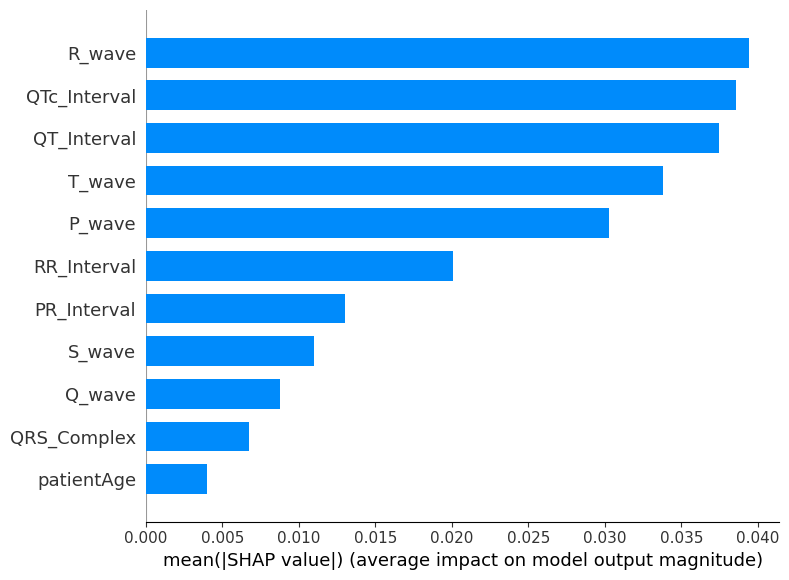

In [60]:
shap.summary_plot(
    shap_values.values,
    X_test_scaled,
    feature_names=feature_names,
    plot_type="bar"
)


# **Feature Impact Direction (Dependence Plot)**

See how one ECG feature affects risk prediction:

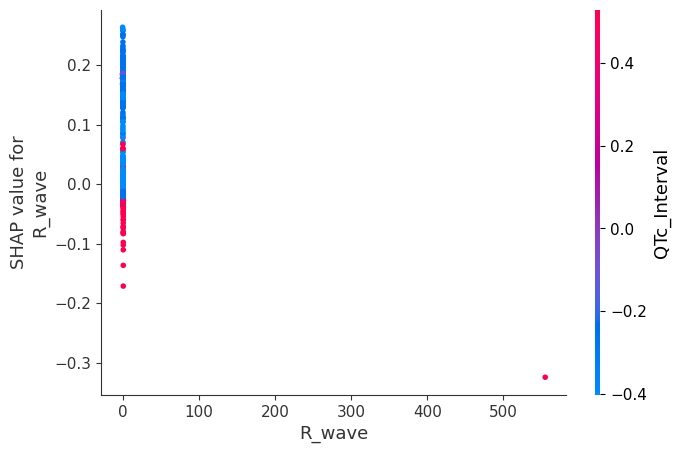

In [62]:
shap.dependence_plot(
    "R_wave",      # replace with actual column name
    shap_values.values,
    X_test_scaled,
    feature_names=feature_names
)


# **Individual Patient Explanation (Local Explainability)**

Explain one patient’s prediction:

# **Medical Interpretation Example**

Positive SHAP value → increases disease risk

Negative SHAP value → lowers disease risk

Larger magnitude → stronger influence